In [1]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [2]:
df = pd.read_csv('csv/iPhoneTweets_combined.csv')

In [3]:
df.head()

,id,date,time,tweet,language
0,1.44213E+18,9/26/2021,10:23:04,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en
1,1.44213E+18,9/26/2021,10:23:04,I kind of want the iPhone 13 🤔,en
2,1.44213E+18,9/26/2021,10:22:51,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en
3,1.44213E+18,9/26/2021,10:22:28,iphone 13 is another huge distraction from the...,en
4,1.44213E+18,9/26/2021,10:22:09,@TrollTheMagic I know you are going to buy iPh...,en


In [4]:
df = df[df['language'] == "en"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37637 entries, 0 to 71539
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        37637 non-null  object
 1   date      37637 non-null  object
 2   time      37637 non-null  object
 3   tweet     37637 non-null  object
 4   language  37637 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
df.isna().sum()

id          0
date        0
time        0
tweet       0
language    0
dtype: int64

In [7]:
df['language'].value_counts()

en    37637
Name: language, dtype: int64

In [8]:
df['date_time'] = df['date'].str.cat(df['time'],sep=" ")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37637 entries, 0 to 71539
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         37637 non-null  object
 1   date       37637 non-null  object
 2   time       37637 non-null  object
 3   tweet      37637 non-null  object
 4   language   37637 non-null  object
 5   date_time  37637 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [10]:
df = df[['id', 'tweet', 'language', 'date_time']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37637 entries, 0 to 71539
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         37637 non-null  object
 1   tweet      37637 non-null  object
 2   language   37637 non-null  object
 3   date_time  37637 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [12]:
df.to_csv('csv/iPhoneTweets_en.csv', index=False)

In [13]:
tweets = pd.read_csv('csv/iPhoneTweets_en.csv')
tweets.head()

,id,tweet,language,date_time
0,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,9/26/2021 10:23:04
1,1.442130e+18,I kind of want the iPhone 13 🤔,en,9/26/2021 10:23:04
2,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,9/26/2021 10:22:51
3,1.442130e+18,iphone 13 is another huge distraction from the...,en,9/26/2021 10:22:28
4,1.442130e+18,@TrollTheMagic I know you are going to buy iPh...,en,9/26/2021 10:22:09


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37637 entries, 0 to 37636
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         37637 non-null  float64
 1   tweet      37637 non-null  object 
 2   language   37637 non-null  object 
 3   date_time  37637 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [15]:
tweets.date_time = pd.to_datetime(tweets.date_time)

In [16]:
tweets[tweets.duplicated()]

,id,tweet,language,date_time


In [17]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [18]:
clean_tweets(tweets)
tweets.head()

<ipython-input-17-d935a36c336b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.clean_tweet[i] = clean_tokens


,id,tweet,language,date_time,clean_tweet
0,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,"[tg, iphone, giveaway]"
1,1.442130e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,"[kind, want, iphone]"
2,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,"[tg, iphone, giveaway]"
3,1.442130e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,"[iphone, another, huge, distraction, enemy, be..."
4,1.442130e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,"[trollthemagic, know, going, buy, iphone, pro,..."


In [19]:
tweets.clean_tweet[4]

['trollthemagic', 'know', 'going', 'buy', 'iphone', 'pro', 'max']

In [20]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [21]:
lemmatize_tweet(tweets.clean_tweet)
tweets

<ipython-input-20-3c8be4455cbc>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet


,id,tweet,language,date_time,clean_tweet
0,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/Wffx...,en,2021-09-26 10:23:04,tg iphone giveaway
1,1.442130e+18,I kind of want the iPhone 13 🤔,en,2021-09-26 10:23:04,kind want iphone
2,1.442130e+18,TG 13 iPhone 13 Giveaway!!! https://t.co/LN1B...,en,2021-09-26 10:22:51,tg iphone giveaway
3,1.442130e+18,iphone 13 is another huge distraction from the...,en,2021-09-26 10:22:28,iphone another huge distraction enemy well hum...
4,1.442130e+18,@TrollTheMagic I know you are going to buy iPh...,en,2021-09-26 10:22:09,trollthemagic know go buy iphone pro max
...,...,...,...,...,...
37632,1.442778e+18,Herh People mean the iPhone 13 basabasa Yi...,en,2021-09-28 05:06:17,herh people mean iphone basabasa yie
37633,1.442778e+18,Brutal 😂😂😂 saskay them y’all say u dey borrow ...,en,2021-09-28 05:05:59,brutal saskay say u dey borrow diane clothes e...
37634,1.442777e+18,made so much profits trading using this royal ...,en,2021-09-28 05:05:22,make much profit trade use royal q idek much i...
37635,1.442777e+18,Join MobileTrans iPhone 13 Contest and Win One...,en,2021-09-28 05:05:20,join mobiletrans iphone contest win one


In [22]:
tweets.clean_tweet[4]

'trollthemagic know go buy iphone pro max'

Common Words

In [23]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

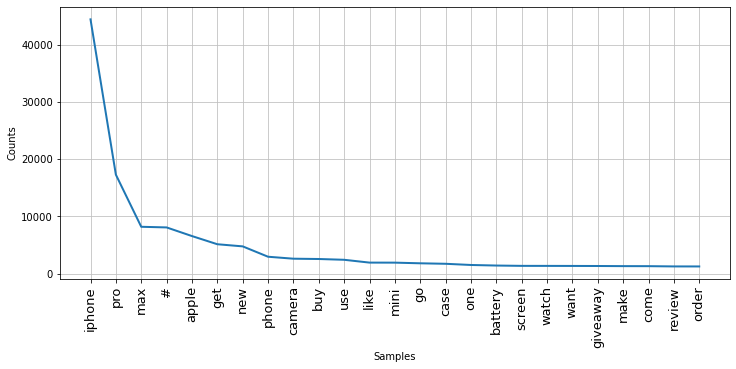

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

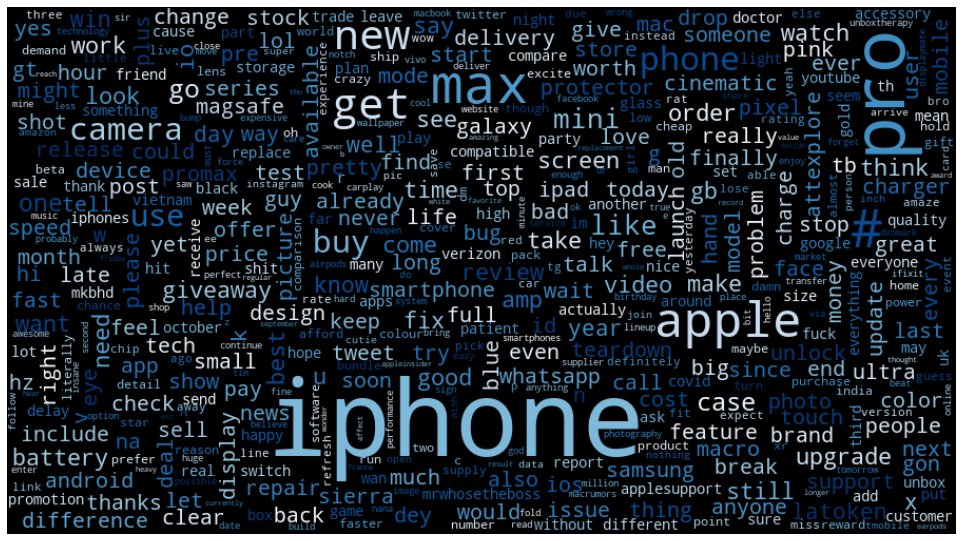

In [25]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Remove 'tesla, 'tsla', 'q', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('iphone',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('apple',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('q',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))

In [28]:
finish_cleaning(tweets)

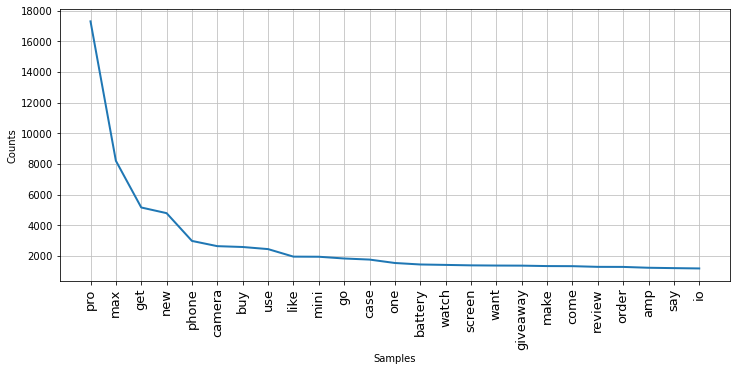

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

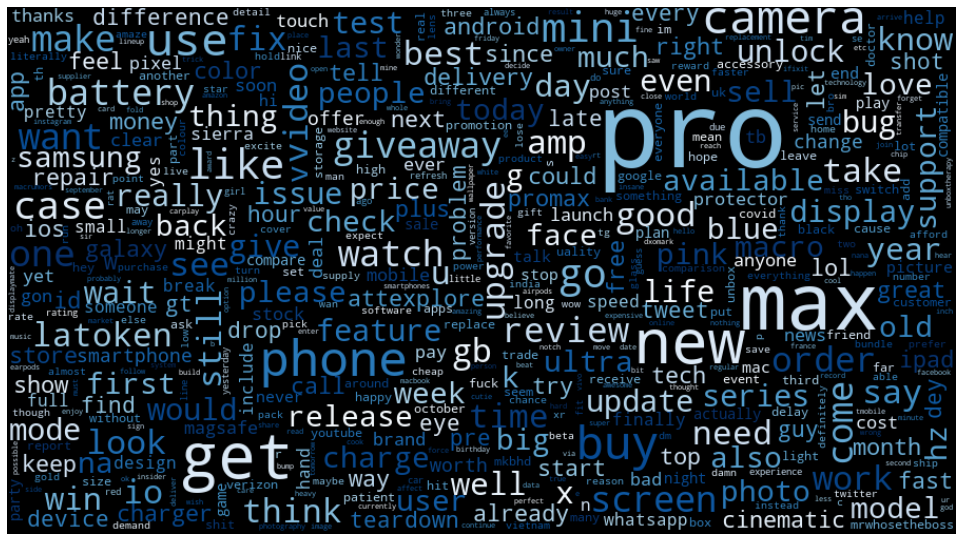

In [30]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
18,pro,17303
19,max,8201
10,get,5153
104,new,4782
12,phone,2969
375,camera,2628
17,buy,2573
72,use,2436
44,like,1944
46,mini,1937


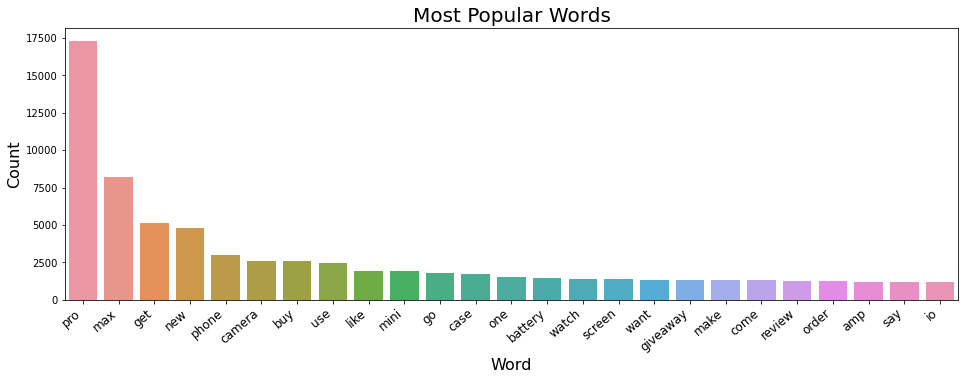

In [32]:

# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

In [33]:
# Create a dataframe grouping the number of tweets by hour of the day

hour_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.hour)['clean_tweet'].count()).reset_index()
hour_df = hour_df.rename(columns={'date_time': 'Hour', 'clean_tweet': 'Count'})
hour_df.Hour = hour_df.Hour.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0], ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM', '8:00 AM', '9:00 AM', '10:00 AM', '11:00 AM', '12:00 AM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'])
hour_df

,Hour,Count
0,12:00 AM,1242
1,1:00 AM,1171
2,2:00 AM,1186
3,3:00 AM,1772
4,4:00 AM,1453
5,5:00 AM,1704
6,6:00 AM,1732
7,7:00 AM,1973
8,8:00 AM,2159
9,9:00 AM,2363


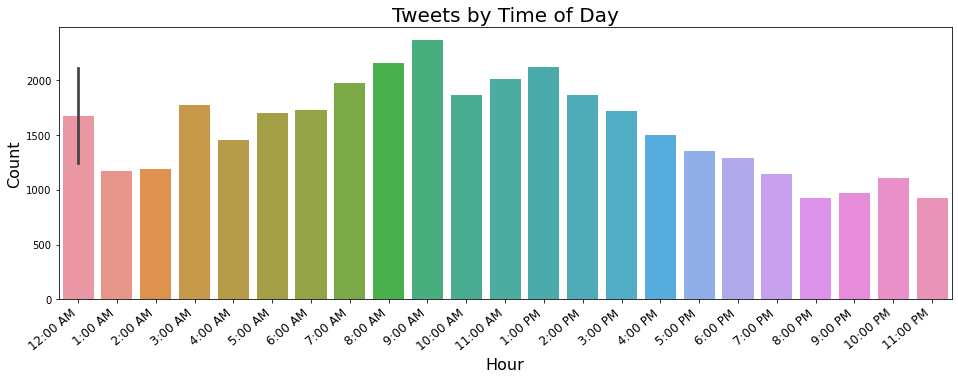

In [34]:
# Plot histogram of Tweet Counts by Hour

plt.figure(figsize=(16,5))
ax = sns.barplot(data=hour_df, x= "Hour", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Hour', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweets by Time of Day", fontsize=20)
plt.show()

In [35]:
# Create a dataframe grouping the number of tweets by hour of the day

weekday_df = pd.DataFrame(tweets.groupby(tweets['date_time'].dt.weekday)['clean_tweet'].count()).reset_index()
weekday_df = weekday_df.rename(columns={'date_time': 'Day', 'clean_tweet': 'Count'})
weekday_df.Day = weekday_df.Day.replace([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_df

,Day,Count
0,Monday,6764
1,Tuesday,4704
2,Wednesday,6012
3,Thursday,5366
4,Friday,5223
5,Saturday,3783
6,Sunday,5785


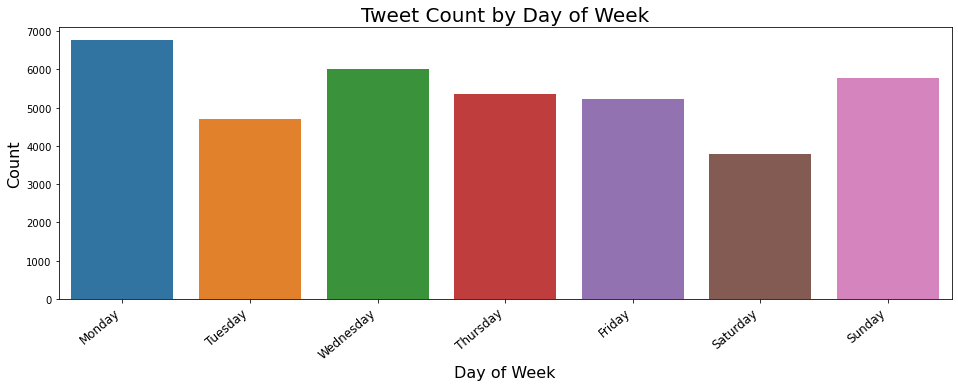

In [36]:
# Plot histogram of Tweet Counts by Day

plt.figure(figsize=(16,5))
ax = sns.barplot(data=weekday_df, x= "Day", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Tweet Count by Day of Week", fontsize=20)
plt.show()